In [4]:
#1
import pandas as pd

# Caricamento del dataset
url = 'https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url)

# Convertire la data nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# a. Dimensioni del dataset
print(f"Dimensioni del dataset: {df.shape}")

# b. Metadati (prime colonne e tipi di dato)
print(df.info())

Dimensioni del dataset: (429435, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                           

In [12]:
#2
# Rimuovere le righe aggregate (dove 'continent' è nullo)
df_continents = df.dropna(subset=['continent']).copy()

# Calcolare il totale dei casi finali per ogni nazione
df_latest = df_continents.groupby('location')['total_cases'].max().reset_index()

# Aggiungere la colonna 'continent'
df_latest = df_latest.merge(df[['location', 'continent']].drop_duplicates(), on='location', how='left')

# a. Calcolare il totale dei casi per continente
df_continent_totals = df_latest.groupby('continent')['total_cases'].sum().reset_index()

# b. Calcolare la percentuale rispetto al totale mondiale
total_world_cases = df_continent_totals['total_cases'].sum()
df_continent_totals['Percentage'] = (df_continent_totals['total_cases'] / total_world_cases) * 100

# Risultato ordinato
df_continent_totals.sort_values(by='total_cases', ascending=False, inplace=True)


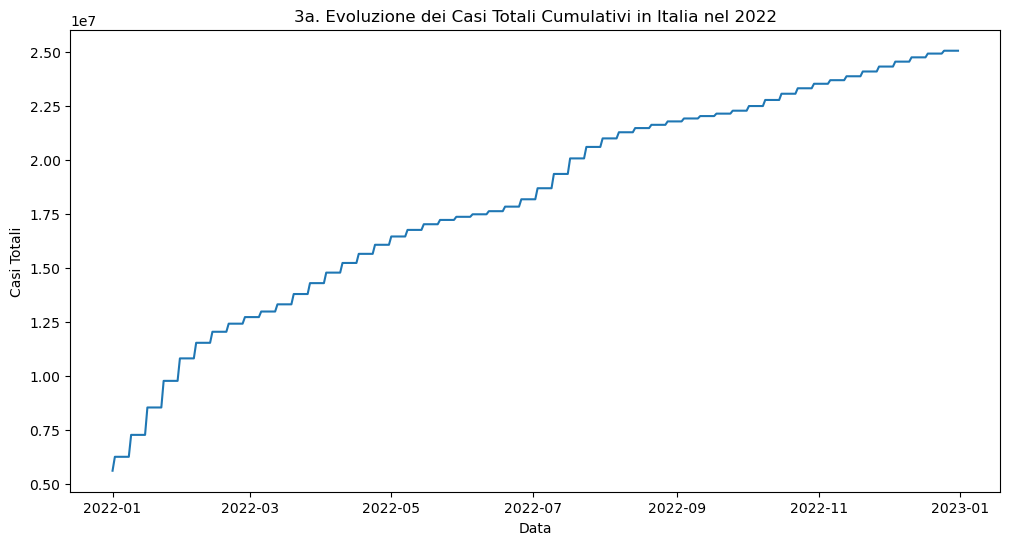

In [15]:
#3a.Evoluzione dei casi totali(cumulativi)
import matplotlib.pyplot as plt
import seaborn as sns

df_italy_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)].copy()
df_italy_2022
# Grafico a linee: total_cases vs date
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_italy_2022, x='date', y='total_cases')
plt.title('3a. Evoluzione dei Casi Totali Cumulativi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.show()

In [ ]:
#Il grafico mostra una linea in costante crescita, tipica di un dato cumulativo.
#La pendenza è più ripida nei periodi di maggiore diffusione del virus, evidenziando il rapido aumento del numero totale dei casi.

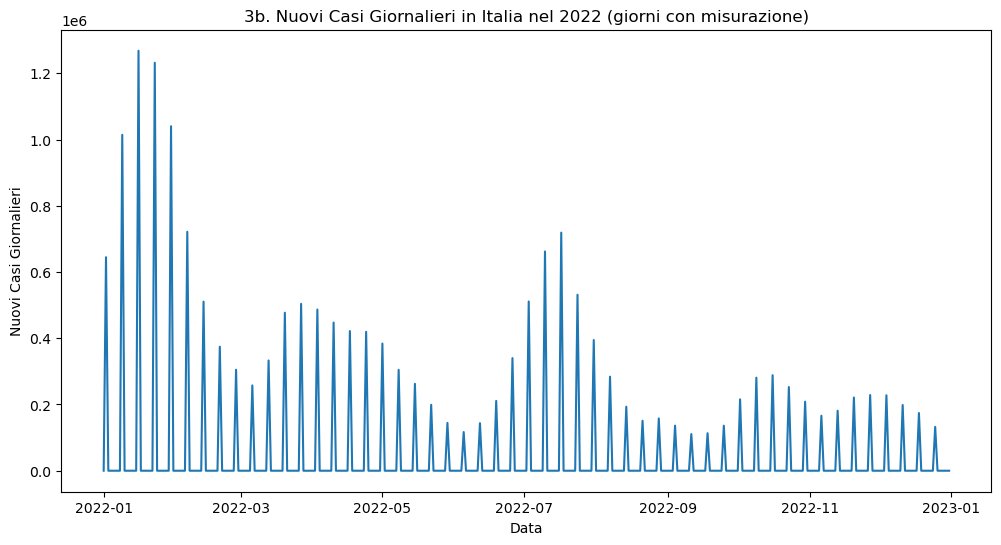

In [27]:
#3b. Numero di nuovi casi
# Filtrare via i giorni che non hanno misurazioni (NaN)
df_italy_2022_filtered = df_italy_2022.dropna(subset=['new_cases'])

# Grafico a linee: new_cases vs date (solo giorni con misurazione)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_italy_2022_filtered, x='date', y='new_cases')
plt.title('3b. Nuovi Casi Giornalieri in Italia nel 2022 (giorni con misurazione)')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi Giornalieri')
plt.show()

In [ ]:
# Il grafico mostra picchi e valli distinti, che corrispondono alle diverse ondate di COVID-19 nel corso del 2022,
# con i massimi raggiunti durante i periodi di alto rischio(es. gennaio2022, estate, autunno).

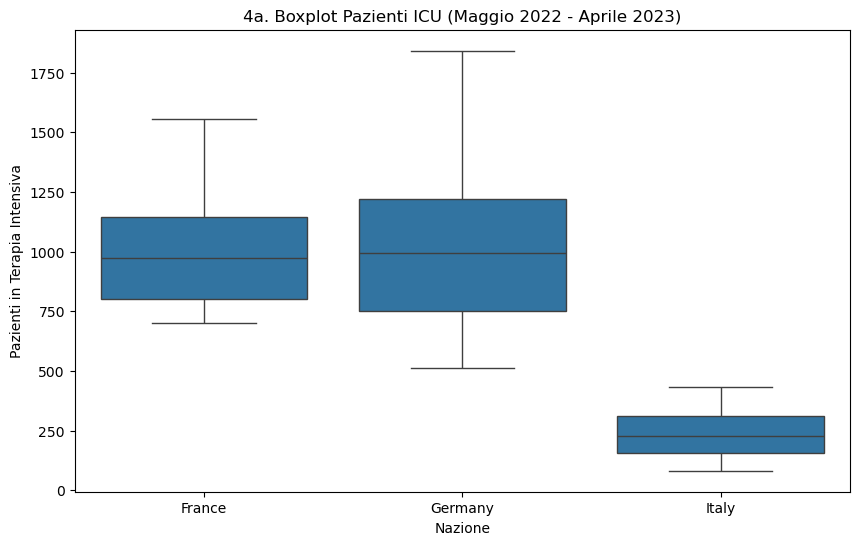

In [28]:
#4 ICU Patients(Italia,Germania,Francia)
#4a. Boxplot
countries_4 = ['Italy', 'Germany', 'France']
start_date_4 = '2022-05-01'
end_date_4 = '2023-04-30'

df_icu = df[
    (df['location'].isin(countries_4)) &
    (df['date'] >= start_date_4) &
    (df['date'] <= end_date_4)
].copy()

# Rimuovere i valori NaN prima del boxplot
df_icu.dropna(subset=['icu_patients'], inplace=True)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=df_icu)
plt.title('4a. Boxplot Pazienti ICU (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Pazienti in Terapia Intensiva')
plt.show()

In [ ]:
# Il boxplot confronta la distribuzione del numero di pazienti in terapia intensiva.
# ​Mediana (linea centrale): Indica il numero di pazienti ICU.
# È probabile che la Germania mostri la mediana più alta, riflettendo un numero maggiore di pazienti assoluti rispetto a Italia e Francia in quel periodo.
​# Intervallo Interquartile la "scatola": Indica la variabilità dei dati. Una scatola più stretta significa che il numero di pazienti è rimasto più stabile.

In [ ]:
# 4b.
# Il boxplot rivela che la Germania ha mantenuto in media (mediana) il numero assoluto più alto di pazienti in terapia intensiva nel periodo Maggio 2022 - Aprile 2023.
# La distanza tra i quartili (IQR) per tutte le nazioni suggerisce una variabilità significativa dei ricoveri ICU,
# probabilmente a causa delle fluttuazioni stagionali o delle ondate virali emerse nel periodo di analisi.

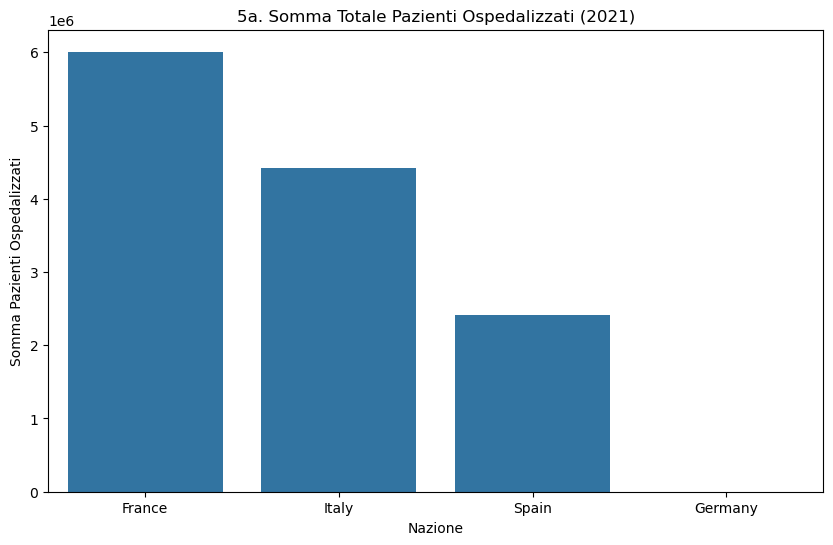

,location,hosp_patients
0,France,6008717.0
1,Italy,4419950.0
2,Spain,2411706.0
3,Germany,0.0


In [22]:
#5 Hosp Patients (Italia,Germania,Francia,Spagna)
#5a.Somma dei pazienti ospedalieri (2021)
countries_5 = ['Italy', 'Germany', 'France', 'Spain']
year_5 = 2021

df_hosp = df[
    (df['location'].isin(countries_5)) &
    (df['date'].dt.year == year_5)
].copy()

# Calcolo della somma totale (escludendo i valori NaN)
hosp_sums = df_hosp.groupby('location')['hosp_patients'].sum().sort_values(ascending=False).reset_index()

# Grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='hosp_patients', data=hosp_sums)
plt.title('5a. Somma Totale Pazienti Ospedalizzati (2021)')
plt.xlabel('Nazione')
plt.ylabel('Somma Pazienti Ospedalizzati')
plt.show()
hosp_sums

In [23]:
#5b.Gestione dei dati nulli
# Conteggio dei dati nulli per nazione
nan_counts = df_hosp.groupby('location')['hosp_patients'].apply(lambda x: x.isnull().sum())
print(nan_counts)

location
France       0
Germany    365
Italy        0
Spain        0
Name: hosp_patients, dtype: int64


In [ ]:
#Presenza di Dati Nulli: La colonna hosp_patients presenta dati mancanti (NaN) per tutte le nazioni nel 2021, a causa di reporting incompleto o discontinuo.
#​Strategia di Sostituzione: Non è possibile gestirli tramite sostituzione se l'obiettivo è calcolare la somma totale.
​#Per calcolare la somma totale (come richiesto al punto 5.a), è fondamentale escludere i NaN con un operazione eseguita automaticamente dal metodo .sum() di Pandas. 
#L'imputazione (es. con la media ) in un contesto di somma cumulativa distorcerebbe il dato finale, creando valori artificiali per interi periodi di non-reporting.